# Titanic: Machine Learning from Disaster

In [60]:
# importing commands
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [61]:
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
print(train_data.shape)
test_data.shape

(891, 12)


(418, 11)

In [63]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [64]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [66]:
train_up = pd.DataFrame()
test_up = pd.DataFrame()

In [67]:
#PassengerID
print(train_data['PassengerId'].isnull().sum())
train_up = train_data.loc[: , ['PassengerId']]
test_up = test_data.loc[:, ['PassengerId']]

0


In [68]:
#Pclass
print(train_data['Pclass'].isnull().sum())
train_data['Pclass'].value_counts()

0


3    491
1    216
2    184
Name: Pclass, dtype: int64

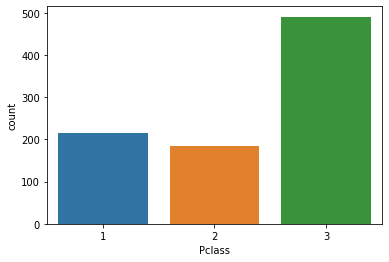

In [69]:
sns.countplot(train_data['Pclass'])

In [70]:
train_up['Pclass'] = train_data['Pclass'].copy()
test_up['Pclass'] = test_data['Pclass'].copy()


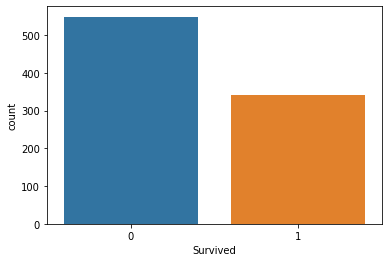

In [71]:
sns.countplot(train_data['Survived'])

In [72]:
# Name
len(train_data['Name'].unique())

891

As each person have a diffrent name in the passenger list and foremost they are characterised by 'PassengerId' , hence dropping this column would be better.

In [73]:
#Sex

print(train_data['Sex'].isnull().sum())
#no missig values

print(train_data['Sex'].value_counts())

0
male      577
female    314
Name: Sex, dtype: int64


In [74]:
train_up['Sex'] = train_data['Sex'].copy()
test_up['Sex'] = test_data['Sex'].copy()

In [75]:
#Age
train_data['Age'].isnull().sum()
test_data['Age'].isnull().sum()

86

In [76]:
age = train_data['Age'].dropna()

C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


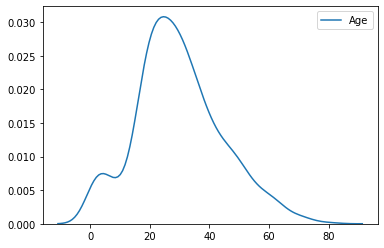

In [77]:
sns.kdeplot(age)

In [78]:
n1 , n2 = np.quantile(age , 0.25) , np.quantile(age , 0.75)
val = [val for val in age.sort_values() if val > n1 and val < n2]
mean = sum(val)/len(val)


In [79]:
# filling up the missing values 
train_data['Age'] = train_data['Age'].fillna(mean)
test_data['Age'] = test_data['Age'].fillna(mean)

In [80]:
train_up['Age'] = train_data['Age'].copy().astype(int) 
test_up['Age'] = test_data['Age'].copy().astype(int) 

In [81]:
# for the columns Sibsp and Parch
train_up['SibSp'] = train_data['SibSp'].copy().astype(int) 
test_up['SibSp'] = test_data['SibSp'].copy().astype(int) 

train_up['Parch'] = train_data['Parch'].copy().astype(int) 
test_up['Parch'] = test_data['Parch'].copy().astype(int) 


In [82]:
#Fare 
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].median())

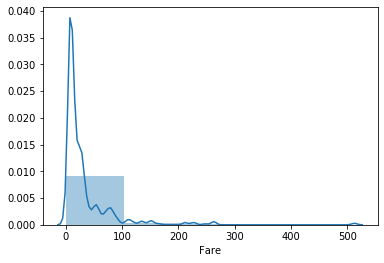

In [83]:
sns.distplot(train_data['Fare'] , bins = 5)

In [84]:
train_up['Fare'] = train_data['Fare'].copy()
test_up['Fare'] = test_data['Fare'].copy()

In [85]:
# Embarked
#train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode())

In [86]:
#train_data['Embarked'].isnull().sum()

In [87]:
#train_up['Embarked'] = train_data['Embarked'].copy()  
#test_up['Embarked'] = test_data['Embarked'].copy()

In [88]:
train_up.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,male,22,1,0,7.2500
1,2,1,female,38,1,0,71.2833
2,3,3,female,26,0,0,7.9250
3,4,1,female,35,1,0,53.1000
4,5,3,male,35,0,0,8.0500


In [89]:
#One Hot Encoding the columns
dummies = pd.get_dummies(train_up['Sex'] , prefix = 'Sex' , drop_first = True)

In [90]:
train_up = pd.concat([train_up , dummies] , axis = 1)
train_up = train_up.drop( 'Sex' , axis = 1)

In [91]:
#One Hot Encoding the columns
dumm = pd.get_dummies(test_up['Sex'] , prefix = 'Sex' , drop_first = True)

In [92]:
test_up = pd.concat([test_up , dumm] , axis = 1)
test_up = test_up.drop( 'Sex' , axis = 1)

In [93]:
test_up.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male'], dtype='object')

In [94]:
train_up.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male'], dtype='object')

In [95]:
y = train_data.loc[: , ['Survived']]

# BUILDING MODELS ON DATASET

In [96]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train_up , y , test_size = 0.25)

In [50]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train , y_train)

C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
# K fold Cross Validation
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator = classifier , X = x_train , y = y_train , cv = 10 , n_jobs = -1)

In [52]:
print(acc)
print(acc.mean())

[0.7761194  0.7761194  0.79104478 0.80597015 0.86567164 0.65671642
 0.8358209  0.80597015 0.84848485 0.84848485]
0.8010402532790593


In [53]:
y_pred = classifier.predict(x_test)

In [59]:
from sklearn import metrics
print("accuracy :" , metrics.accuracy_score(y_test , y_pred))

accuracy : 0.7623318385650224


In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred , y_test)

In [55]:
cm

array([[121,  25],
       [ 28,  49]], dtype=int64)

In [56]:
y_prediction = classifier.predict(test_up)

In [45]:
output=pd.DataFrame(data={"PassengerId":test_up["PassengerId"],"Survived":y_prediction})
output.to_csv(path_or_buf=r"C:\Users\Dhruv Sharma\Desktop\hackathon\Titanic_kaggle\prediction.csv",index=False,sep=',')

DecisionTree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [47]:
#applying the grid search 
from sklearn.model_selection import GridSearchCV
params = [{'max_depth': [5, 10 , 20 , 30] , 'criterion' : ['entropy'] , 'random_state' : [42]},
           {'splitter': ['best'] , 'random_state' : [42] ,'max_depth': [4, 5, 6 , 3, 2] ,'criterion' : ['gini']}]
grid_search = GridSearchCV(estimator = clf, 
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train , y_train)

C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [5, 10, 20, 30], 'criterion': ['entropy'], 'random_state': [42]}, {'splitter': ['best'], 'random_state': [42], 'max_depth': [4, 5, 6, 3, 2], 'criterion': ['gini']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [48]:
best_accuracy = grid_search.best_score_
best_para = grid_search.best_params_

In [49]:
best_accuracy

0.8083832335329342

In [50]:
best_para

{'criterion': 'gini', 'max_depth': 3, 'random_state': 42, 'splitter': 'best'}

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3 , random_state = 42  , splitter = 'best')
clf.fit(x_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [52]:
y_final = clf.predict(x_test)

In [53]:
from sklearn import metrics
print("accuracy :" , metrics.accuracy_score(y_test , y_final))

accuracy : 0.8161434977578476


In [54]:
y_predictions = clf.predict(test_up)

In [55]:
output=pd.DataFrame(data={"PassengerId":test_up["PassengerId"],"Survived":y_predictions})
output.to_csv(path_or_buf=r"C:\Users\Dhruv Sharma\Desktop\hackathon\Titanic_kaggle\prediction.csv",index=False,sep=',')

Performing XgBoost

In [57]:
from xgboost import XGBClassifier 
model = XGBClassifier(random_state = 42)
model.fit(x_train , y_train)

C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [58]:
y_pred2 = model.predict(x_test)

In [59]:
from sklearn import metrics
print("accuracy is" , metrics.accuracy_score(y_test , y_pred2))

accuracy is 0.8295964125560538


In [60]:
y_predict2 = model.predict(test_up)

In [61]:

output=pd.DataFrame(data={"PassengerId":test_up["PassengerId"],"Survived":y_predict2})
output.to_csv(path_or_buf=r"C:\Users\Dhruv Sharma\Desktop\hackathon\Titanic_kaggle\prediction.csv",index=False,sep=',')

In [98]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [99]:
model.fit(x_train , y_train)

C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [101]:
model.score(x_train , y_train)

0.7889221556886228

In [100]:
y_nb = model.predict(x_test)

In [102]:
from sklearn import metrics
print("accuracy :" , metrics.accuracy_score(y_test , y_nb))

accuracy : 0.7847533632286996


In [103]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train , y_train)

C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
model2.score(x_train , y_train)

0.9895209580838323

In [105]:
y_rfc = model2.predict(x_test)

In [106]:
from sklearn import metrics
print("accuracy :" , metrics.accuracy_score(y_test , y_rfc))

accuracy : 0.8071748878923767


In [107]:
y_output = model2.predict(test_up)

In [108]:
output=pd.DataFrame(data={"PassengerId":test_up["PassengerId"],"Survived":y_output})
output.to_csv(path_or_buf=r"C:\Users\Dhruv Sharma\Desktop\hackathon\Titanic_kaggle\prediction2.csv",index=False,sep=',')